In [167]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import category_encoders as ce
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from xgboost import plot_importance
from matplotlib import pyplot as plt

In [172]:
df = pd.read_csv('train.csv')

In [173]:
df.describe()

,entity_id,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,...,att152,att153,att154,att155,att156,att157,att158,att159,att160,week,Clicks,Conversions
count,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,...,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000
mean,11357.256647,0.450973,0.349694,0.921170,0.549027,0.644210,0.349694,0.391946,0.050328,0.022939,0.032017,0.026232,...,0.002937,0.003693,0.003560,0.002403,0.003604,0.390077,0.003204,0.003538,0.003404,30.494271,8.055779,0.467727
std,6715.822919,0.497596,0.476879,0.269476,0.497596,0.478757,0.476879,0.488190,0.218624,0.149711,0.176047,0.159826,...,0.054114,0.060662,0.059559,0.048961,0.059929,0.487773,0.056513,0.059374,0.058246,0.499973,30.756230,1.963123
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000
25%,4789.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000
50%,12194.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,2.000000,0.000000
75%,16640.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,5.000000,0.000000
max,22836.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1801.000000,90.000000


In [174]:
df['conversion_rate'] = df['Conversions'] / df['Clicks']
df.drop(['Conversions', 'Clicks'], axis=1, inplace=True)

In [175]:
df.describe()

,entity_id,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,...,att151,att152,att153,att154,att155,att156,att157,att158,att159,att160,week,conversion_rate
count,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,...,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000,44945.000000
mean,11357.256647,0.450973,0.349694,0.921170,0.549027,0.644210,0.349694,0.391946,0.050328,0.022939,0.032017,0.026232,...,0.003894,0.002937,0.003693,0.003560,0.002403,0.003604,0.390077,0.003204,0.003538,0.003404,30.494271,0.058249
std,6715.822919,0.497596,0.476879,0.269476,0.497596,0.478757,0.476879,0.488190,0.218624,0.149711,0.176047,0.159826,...,0.062278,0.054114,0.060662,0.059559,0.048961,0.059929,0.487773,0.056513,0.059374,0.058246,0.499973,0.266773
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,4789.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
50%,12194.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
75%,16640.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,0.000000
max,22836.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,19.000000


In [90]:
transout = []
for row in df['week'].iteritems():
    if row[1] == 30:
        transout.append(1)
    else:
        transout.append(0)

df.drop('week', axis=1, inplace=True)
df['is_week_30'] = transout

In [91]:
df.isnull().sum().sort_values(ascending=True)

entity_id     0
att105        0
att106        0
att107        0
att108        0
             ..
att56         0
att57         0
att58         0
att60         0
is_week_30    0
Length: 164, dtype: int64

In [92]:
bins = np.linspace(0, len(df),4495)
y_binned = np.digitize(df['conversion_rate'], bins)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('conversion_rate', axis=1), df['conversion_rate'], 
                                                    test_size=0.25, random_state=42, stratify=y_binned)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [118]:
be = ce.OneHotEncoder(cols=['device'], drop_invariant=True, use_cat_names=True)
be.fit(X_train, y_train)

X_train = be.transform(X_train)
X_test = be.transform(X_test)


X_train = X_train.drop(['entity_id'], axis=1)
X_test = X_test.drop(['entity_id'], axis=1)

In [95]:
cnt = df_train_oh['entity_id'].value_counts()
print(len(cnt))

16467


In [119]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [176]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
mse = mean_squared_error(y_test, predictions)

In [152]:
thresholds = model.feature_importances_
thresholds = sorted(list(set(thresholds)))
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBRegressor()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    mse = mean_squared_error(y_test, predictions)
    print("Thresh=%.5f, n=%d, MSE: %.2f%%" % (thresh, select_X_train.shape[1], mse))

Thresh=0.000, n=164, MSE: 0.07%
Thresh=0.000, n=157, MSE: 0.07%
Thresh=0.000, n=156, MSE: 0.07%
Thresh=0.000, n=155, MSE: 0.07%
Thresh=0.000, n=154, MSE: 0.07%
Thresh=0.001, n=153, MSE: 0.07%
Thresh=0.001, n=152, MSE: 0.07%
Thresh=0.001, n=151, MSE: 0.07%
Thresh=0.001, n=150, MSE: 0.07%
Thresh=0.001, n=149, MSE: 0.07%
Thresh=0.001, n=148, MSE: 0.07%
Thresh=0.001, n=147, MSE: 0.07%
Thresh=0.001, n=146, MSE: 0.07%
Thresh=0.001, n=145, MSE: 0.07%
Thresh=0.001, n=144, MSE: 0.07%
Thresh=0.001, n=143, MSE: 0.07%
Thresh=0.001, n=142, MSE: 0.07%
Thresh=0.001, n=141, MSE: 0.07%
Thresh=0.001, n=140, MSE: 0.07%
Thresh=0.001, n=139, MSE: 0.07%
Thresh=0.001, n=138, MSE: 0.07%
Thresh=0.001, n=137, MSE: 0.07%
Thresh=0.001, n=136, MSE: 0.07%
Thresh=0.002, n=135, MSE: 0.07%
Thresh=0.002, n=134, MSE: 0.07%
Thresh=0.002, n=133, MSE: 0.07%
Thresh=0.002, n=132, MSE: 0.07%
Thresh=0.002, n=131, MSE: 0.07%
Thresh=0.002, n=130, MSE: 0.07%
Thresh=0.002, n=129, MSE: 0.07%
Thresh=0.002, n=128, MSE: 0.07%
Thresh=0

Text(0.5, 0, 'Conversion Rate Feature Importance')

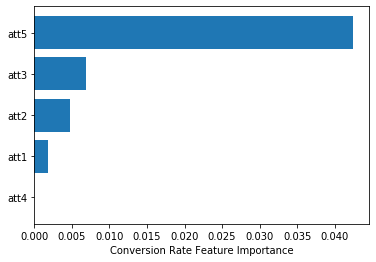

In [171]:
fi = model.feature_importances_[:5]
sorted_idx = fi.argsort()
plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Conversion Rate Feature Importance")

In [157]:
selection = SelectFromModel(model, threshold=0.043, prefit=True)
select_X_train = selection.transform(X_train)
selection_model = XGBRegressor()
selection_model.fit(select_X_train, y_train)

print(select_X_train.shape)

select_X_test = selection.transform(X_test)
predictions = selection_model.predict(select_X_test)
select_mse = mean_squared_error(y_test, predictions)
select_mse

(33708, 1)


0.06253091406469011